Comparing azlearn GradientBoostingClassifier and sklearn GradientBoostingClassifier

Accuracy comparison
azlearn GradientBoostingClassifier accuracy: 0.4123
sklearn GradientBoostingClassifier accuracy: 0.9561


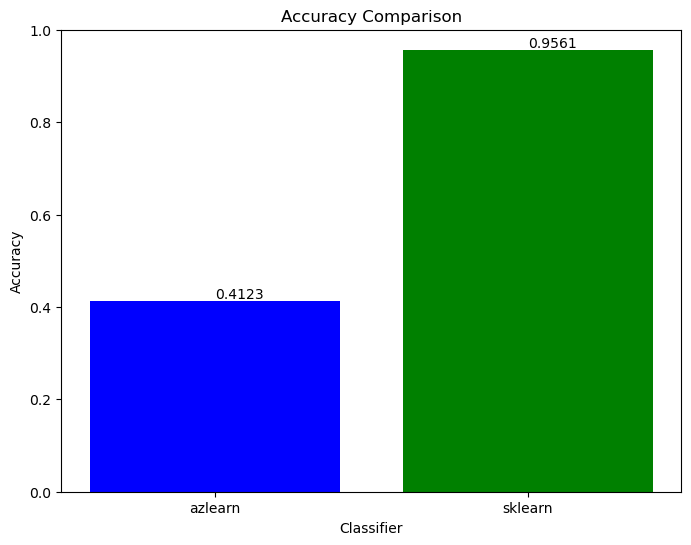

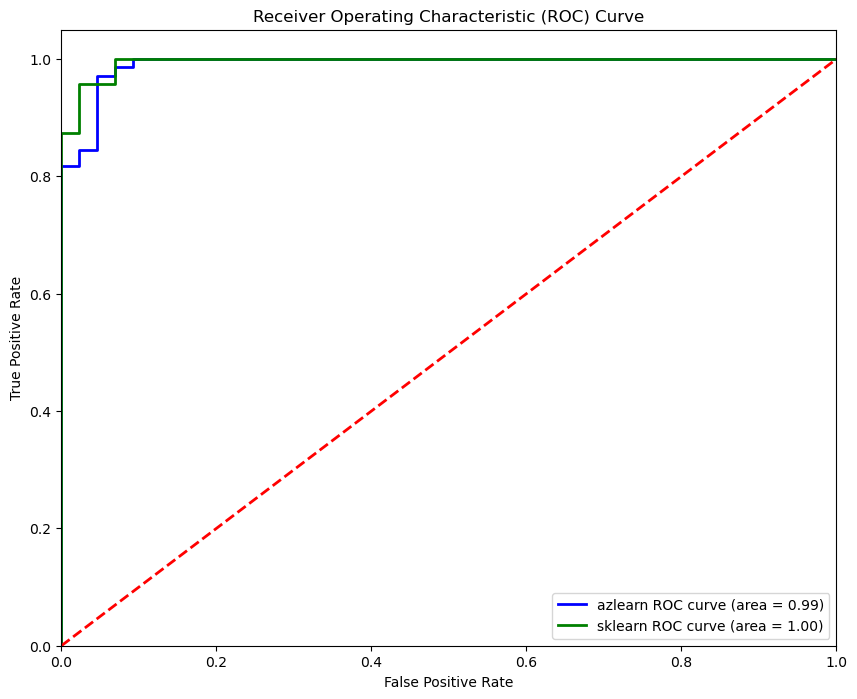

In [3]:
import sys
sys.path.insert(1, '../azlearn')

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier as SklearnGradientBoostingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from azlearn.ensemble.GradientBoost import GradientBoostingClassifier
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target

print("Comparing azlearn GradientBoostingClassifier and sklearn GradientBoostingClassifier")

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train azlearn GradientBoostingClassifier model
az_gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
az_gb_model.fit(X_train, y_train)

# Train sklearn GradientBoostingClassifier model (for comparison)
sklearn_gb_model = SklearnGradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
sklearn_gb_model.fit(X_train, y_train)

# Make predictions
y_pred_az = az_gb_model.predict(X_test)
y_pred_sklearn = sklearn_gb_model.predict(X_test)

# Evaluate models on the test set
accuracy_az = accuracy_score(y_test, y_pred_az)
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)

print("\nAccuracy comparison")
print(f"azlearn GradientBoostingClassifier accuracy: {accuracy_az:.4f}")
print(f"sklearn GradientBoostingClassifier accuracy: {accuracy_sklearn:.4f}")

# Plot accuracy comparison
plt.figure(figsize=(8, 6))
classifiers = ['azlearn', 'sklearn']
accuracies = [accuracy_az, accuracy_sklearn]
bars = plt.bar(classifiers, accuracies, color=['blue', 'green'])
plt.ylim(0, 1.0)
plt.title('Accuracy Comparison')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')

# Add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom') 

plt.show()

# Plot ROC curve comparison
probas_az = az_gb_model.predict_proba(X_test)
probas_sklearn = sklearn_gb_model.predict_proba(X_test)
fpr_az, tpr_az, _ = roc_curve(y_test, probas_az[:, 1])
roc_auc_az = auc(fpr_az, tpr_az)
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, probas_sklearn[:, 1])
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

plt.figure(figsize=(10, 8))
plt.plot(fpr_az, tpr_az, color='blue', lw=2, label=f'azlearn ROC curve (area = {roc_auc_az:.2f})')
plt.plot(fpr_sklearn, tpr_sklearn, color='green', lw=2, label=f'sklearn ROC curve (area = {roc_auc_sklearn:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()
